In [44]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /home/khanh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:

f1 = pd.read_csv("emails.csv")
f2 = pd.read_csv("spam_ham_dataset.csv")

data= pd.concat([pd.DataFrame(f1["text"], columns=["text"]), pd.DataFrame(f2["text"], columns=["text"])])

label= pd.concat([pd.DataFrame(f1["label"], columns=["label"]), pd.DataFrame(f2["label"], columns=["label"])])
print(label)

      label
0         1
1         1
2         1
3         1
4         1
...     ...
5166      0
5167      0
5168      0
5169      0
5170      1

[10899 rows x 1 columns]


In [20]:
def clean_text(text):
    
    # Remove the punctuations
    text = ''.join([char for char in text if char not in string.punctuation])
    
    # Tokenize the words
    words = text.split()
    
    # Remove stopwords and apply stemming (the library we use)
    stop_words = stopwords.words('english')
    stemmer = SnowballStemmer('english')
    words = [stemmer.stem(word) for word in words if word.lower() not in stop_words]
    return ' '.join(words)

data['clean_text'] = data['text'].apply(clean_text)

In [29]:
tfidf_vectorizer = TfidfVectorizer()
X=tfidf_vectorizer.fit_transform(data["clean_text"])
y=label["label"]

In [42]:
X_train, X_text, y_train, y_test=train_test_split(X, y ,test_size=0.2,random_state=42)

In [43]:
# Define models
models = {
    "Naive Bayes": MultinomialNB(),
    "SVM": SVC(),
}

best_results = {}
best_model_name = None
best_accuracy = 0.0 

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)  # Training  the model
    y_pred = model.predict(X_text)  # Predict on the test set

    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    best_results[name] = accuracy  # Store accuracy in the results dictionary

    # Display accuracy and classification report for the current model
    print(f"{name} Accuracy: {accuracy:.2f}")
    print("-----------------------------------------------------")
    print(classification_report(y_test, y_pred))

    # Check if this is the best accuracy so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model_name = name

# Display the model with the best accuracy at the end
print("\nBest Model:")
print(f"{best_model_name} with Accuracy: {best_accuracy:.2f}")

Naive Bayes Accuracy: 0.89
-----------------------------------------------------
              precision    recall  f1-score   support

           0       0.87      1.00      0.93      1594
           1       0.99      0.61      0.75       586

    accuracy                           0.89      2180
   macro avg       0.93      0.80      0.84      2180
weighted avg       0.91      0.89      0.88      2180

SVM Accuracy: 0.99
-----------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1594
           1       0.98      0.99      0.99       586

    accuracy                           0.99      2180
   macro avg       0.99      0.99      0.99      2180
weighted avg       0.99      0.99      0.99      2180


Best Model:
SVM with Accuracy: 0.99


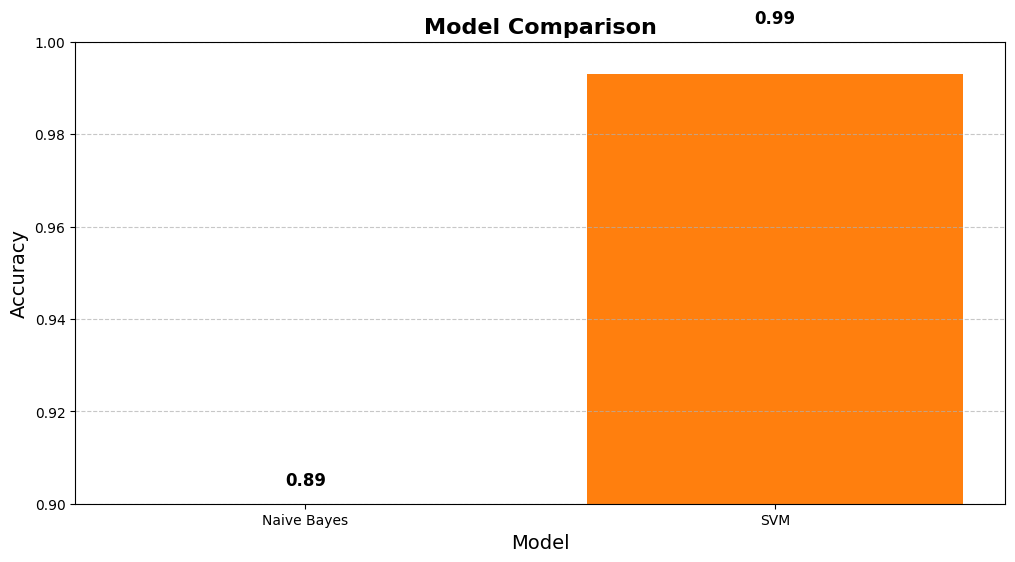

In [45]:
# Visualize the models Accuracy 

# Define a color palette
colors = ['#1f77b4', '#ff7f0e']  # Example colors: blue and orange

plt.figure(figsize=(12, 6))
bars = plt.bar(best_results.keys(), best_results.values(), color=colors)
plt.title('Model Comparison', fontsize=16, fontweight='bold')
plt.xlabel('Model', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.ylim(0.9, 1.0)

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()